# MPO 624 - Homework 1

## My dataset summary

Tiago Carrilho Bilo
C#11950866

### My dataset: brief description 

In order to complete the requirements of the course MPO 624, I decided to explore the Meridional Heat Transport (MHT) in the North Atlantic computed from the Estimating the Circulation and Climate of the Ocean, Phase II (ECCO2): High-Resolution Global-Ocean and Sea-Ice Data Synthesis. 

The MHT is defined as the zonally and vertically-integrated heat transport over a entire oceanic basin (e.g., North Atlantic). Here I'm going to work with the following definition of MHT:

MHT = $\int^{surface}_{bottom} \int^{X_{east}}_{X_{west}} \rho Cp v \theta dx dz$,

where x and z are the horizontal (longitude) and vertical coordinates respectively,  and $\rho$, Cp, v, and $\theta$ are the density, specific heat, the meridional velocity component, and potential temperature of the seawater respectively.

During the MPO 624 coursework, I will try to better understand the large-scale characteristics of the MHT in the North Atlantic. Therefore, I chose the monthly-averaged outputs from the ECCO2 model for the period comprised by the years of 1992 and 2013.  




## Data format: units and dimensions 

In [1]:
# importing libraries
import numpy as np
import netCDF4 
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Unables latex syntax in string variables 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

# Nice graph sytle from old oeans package (https://github.com/ocefpaf/python-oceans)
from oceans_old.plotting import rstyle

##### Importing the dataset to the memory

In [2]:
# Here I imported my dataset from a local repository, however it is available to download at
# https://drive.google.com/file/d/0B1zX-YKTIg_aRGlFRUdJME9BNGs/view?usp=sharing
data = netCDF4.Dataset('../../../research/data/ECCO2/MHT/ecco2_mht_CV_correction.nc','r')

# available variables 
data.variables.keys()

[u'lon', u'lat', u'depth', u'time', u'mht', u'integrated_mht']




Here I'm going to work with the variable integrated_mht = f(time,latitude), which corresponds to the MHT as defined above. 

    time           = time     [days from 1992-01-01 00:00:00]
    lat            = latitude [degrees N]
    integrated_mht = MHT      [PW] 



In [3]:
# Latitude 
lat = data['lat'][:]

print "Dimension = "+ np.str(lat.shape)
print "Minimum = "+ np.str(lat.min())
print "Maximum = "+ np.str(lat.max())
print "Spatial resolution = "+ np.str(np.diff(lat)[0])

Dimension = (240,)
Minimum = 10.125
Maximum = 69.875
Spatial resolution = 0.25


In [4]:
# Time 
time = data['time'][:]                                           # Conventional "continous" time axis
date = netCDF4.num2date(time,'days since 1992-01-01 00:00:00')   # Python date system


print "Dimension = "+ np.str(time.shape)
print "Minimum = "+ np.str(time.min())+" days since 1992-01-01 or "+ date[0].strftime('%B-%Y')
print "Maximum = "+ np.str(time.max())+" days since 1992-01-01 or "+ date[-1].strftime('%B-%Y')

Dimension = (264,)
Minimum = 0.0 days since 1992-01-01 or January-1992
Maximum = 8005.0 days since 1992-01-01 or December-2013


In [5]:
# MHT
mht = data['integrated_mht'][:]

print "Dimension = "+ np.str(mht.shape)
print "Minimum = "+ np.str(np.nanmin(mht))+' Pw'
print "Maximum = "+ np.str(np.nanmax(mht))+' Pw'


Dimension = (264, 240)
Minimum = -0.51866138917 Pw
Maximum = 1.4200789269 Pw




Note the MHT has negative and positive values. Negative (positive) MHT values indicate southward (northward) heat transport !





## Visualizing the data and its basic statistics



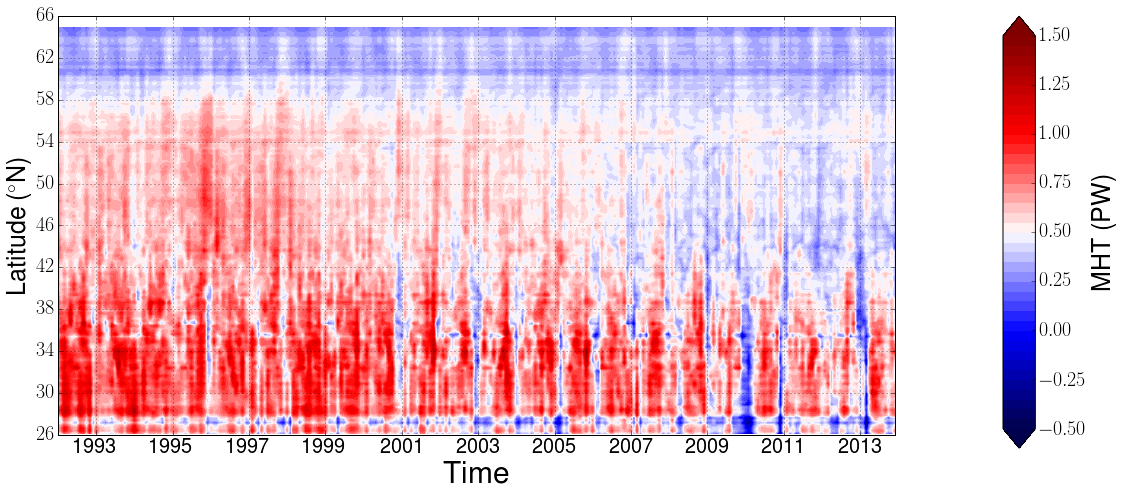

In [6]:
## Visualization of the entire dataset 
fig1 = plt.figure(num=1,figsize=(15,7.5),facecolor='w')
ax1 = plt.gca()

# Ploting data
cm1 = ax1.contourf(date,lat,mht.transpose(),np.arange(-0.5,1.55,0.05),cmap='seismic',extend='both')

# Seting the colorbar
cbaxes1 = fig1.add_axes([1., 0.1, 0.03, 0.8])
cb1 = fig1.colorbar(cm1,cax=cbaxes1,extend='both',ticks=np.arange(-0.5,1.75,0.25)) 
cb1.ax.tick_params(labelsize=20)
cb1.set_label('MHT (PW)',fontsize=25,fontweight='bold')

# Seting the axes (study area 26N<lat<65N)
ax1.set_ylim(26,65)
ax1.set_yticks(range(26,69,4))
ax1.set_xticks(date[range(12,253,24)])
ax1.tick_params(labelsize=20)

ax1.set_ylabel(ur"Latitude ($^{\circ}$N)",fontsize=25,fontweight='bold')  
ax1.set_xlabel("Time",fontsize=30,fontweight='bold')

ax1.grid('on')


The figure above depicts all the dataset as a function of time and latitude. Note that most of the time the MHT is poleward with rare periods of inversion of sign (e.g., 2010 at 26-30N). Another obvious characteristic of the ECCO2 outputs is the significant decrease of the MHT northward, as the presence of more bluish colors (i.e., smaller MHT) in the graph after approximately 2007. 


##### Refining the understanding of data distribution 


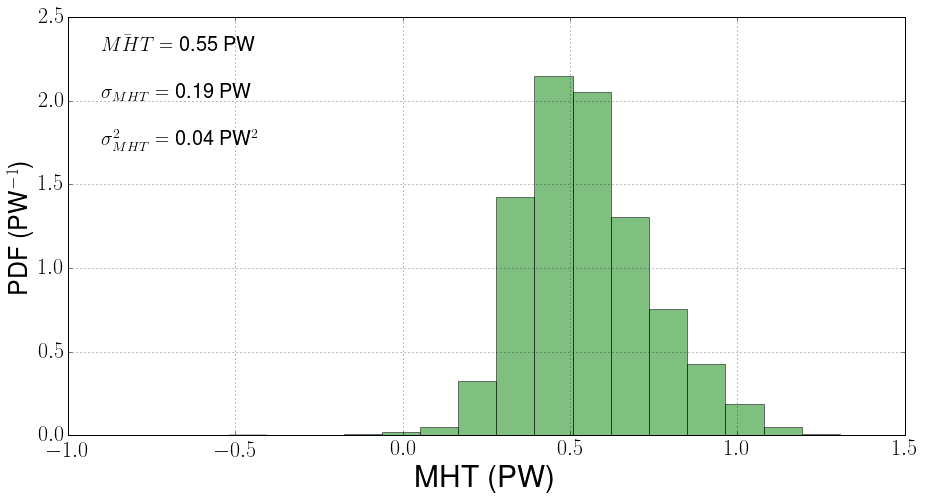

In [7]:
## Accessing the basics statistics

# Removing Nan from dataset in order to use the plt.hist function
mht_1d = mht.reshape(mht.shape[0]*mht.shape[1])
mht_1d = mht_1d[~np.isnan(mht_1d)]

fig2 = plt.figure(num=2,figsize=(15,7.5),facecolor='w')
ax2 = plt.gca()

nbins = np.ceil(1 + np.log2(mht_1d.shape[0]))
n, bins, patches = ax2.hist(mht_1d,nbins,normed=True,facecolor='green',alpha=0.5)

# Seting the axes
ax2.tick_params(labelsize=22)
ax2.set_ylabel(ur"PDF (PW$^{-1}$)",fontsize=25,fontweight='bold')  
ax2.set_xlabel("MHT (PW)",fontsize=30,fontweight='bold')

ax2.grid('on')

# Ploting some info about general statistics
kw = dict(fontsize=20,fontweight='demibold')   # nice example of some keywords handling 
ax2.text(-0.9,2.3,ur'$\bar{MHT} = $ %1.2f PW'%(mht_1d.mean()),**kw)
ax2.text(-0.9,2.0,ur'$\sigma_{MHT}= $ %1.2f PW'%(mht_1d.std()),**kw)
ax2.text(-0.9,1.7,ur'$\sigma^{2}_{MHT}= $ %1.2f PW$^{2}$'%(mht_1d.var()),**kw)



The histogram shwos the distrbiution of the MHT dataset. As we would expect, the distribution resembles a Gaussian-shaped distribution, with most of the values positive (rare events less MHT$<$0 PW). The mean ($\bar{MHT}$) and standard deviation are approximately 0.55 and 0.19 PW respectively. 



##### Examples: Data subsets  



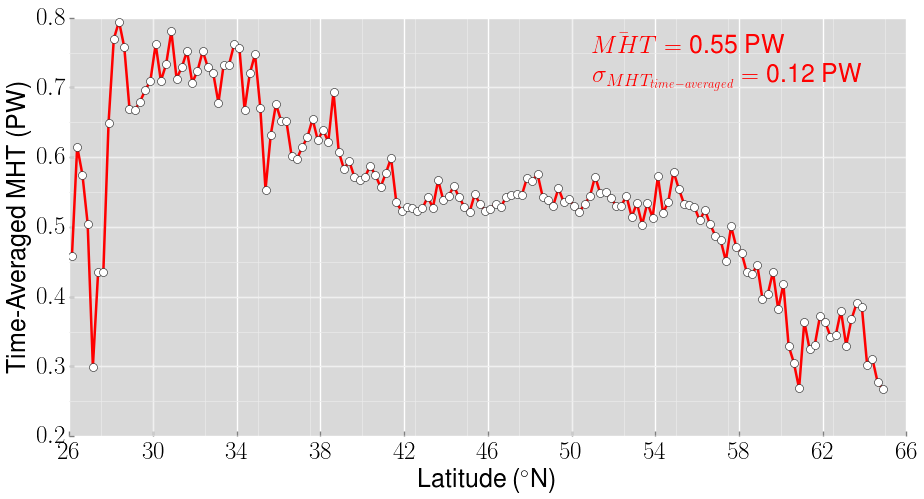

In [8]:
## Time-avereged over each latitude 
fig3 = plt.figure(num=3,figsize=(15,7.5),facecolor='w')
ax3 = plt.gca()

ax3.plot(lat,np.mean(mht,axis=0),color='r',lw=2.5)
ax3.plot(lat,np.mean(mht,axis=0),'wo',markersize=8)
rstyle(ax3)


# Seting the axes (study area 26N<lat<65N)
ax3.set_xlim(26,65)
ax3.set_xticks(range(26,69,4))
ax3.tick_params(labelsize=25)

ax3.set_xlabel('Latitude ($^{\circ}$N)',fontsize=25,fontweight='bold')
ax3.set_ylabel(ur'Time-Averaged MHT (PW)',fontsize=25,fontweight='bold')

# Ploting some info about general statistics
kw1 = dict(color='r',fontsize=25,fontweight='bold')
ax3.text(51,0.75,ur'$\bar{MHT} = $ %1.2f PW'%(np.nanmean(np.mean(mht,axis=0))),**kw1)
ax3.text(51,0.70,ur'$\sigma_{MHT_{time-averaged}} = $ %1.2f PW'%(np.nanstd(np.mean(mht,axis=0))),**kw1)


Here we can see the time-averaged MHT in the last approximately 30 years, predicted by the ECCO2 model.

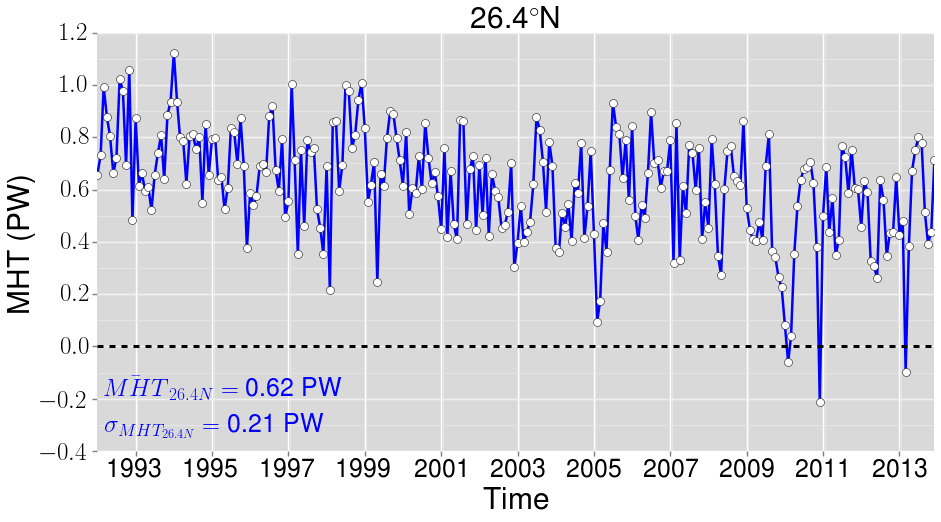

In [9]:
## MHT time-series at 26.5 N 
fig4 = plt.figure(num=3,figsize=(15,7.5),facecolor='w')
ax4 = plt.gca()

i26 = np.abs(lat-26.5).argmin()
ax4.plot(date,mht[:,i26],color='b',lw=2.5)
ax4.plot(date,mht[:,i26],'wo',markersize=8)
ax4.plot([date[0],date[-1]],[0,0],'k--',lw=3.0)
rstyle(ax4)


# Seting the axes (study area 26N<lat<65N)
ax4.set_xticks(date[range(12,253,24)])
ax4.tick_params(labelsize=25)

ax4.set_xlabel('Time',fontsize=30,fontweight='bold')
ax4.set_ylabel(ur'MHT (PW)',fontsize=30,fontweight='bold')
ax4.set_title(ur'%1.1f$^{\circ}$N'%(lat[i26]),fontsize=30,fontweight='bold')

# Ploting some info about general statistics
kw2 = dict(color='b',fontsize=25,fontweight='bold')
ax4.text(date[2],-0.2,ur'$\bar{MHT}_{%1.1fN} = $ %1.2f PW'%(lat[i26],np.nanmean(mht[:,i26])),**kw2)
ax4.text(date[2],-0.35,ur'$\sigma_{MHT_{%1.1fN}} = $ %1.2f PW'%(lat[i26],np.nanstd(mht[:,i26])),**kw2)


The time-series above represents the time-depency of the MHT at 26.4$^{\circ}$ N. The MHT variations at 24.5$^{\circ}$N derived from numerical models and observations were widely described and discussed in the literature. At a first glance, the ECCO2 outputs underestimate the MHT from other datasets (e. g., Johns et al. 2011). Moreover, the presence of negative MHT at 3 different months is something to be investigated. 



In [10]:
## Saving figures to your computer
#fig1.savefig('alldataset_mht.png',format='png',bbox_inches='tight',pad_inches=0.5)
#fig2.savefig('alldataset_mht_hist.png',format='png',bbox_inches='tight',pad_inches=0.5)
#fig3.savefig('time_averaged_mht.png',format='png',bbox_inches='tight',pad_inches=0.5)
#fig4.savefig('mht_26N.png',format='png',bbox_inches='tight',pad_inches=0.5)